In [1]:
from os import path
from glob import glob
from matplotlib import font_manager, pyplot as plt
from pandas import read_csv, to_datetime, concat, DataFrame

<Figure size 1500x1000 with 0 Axes>

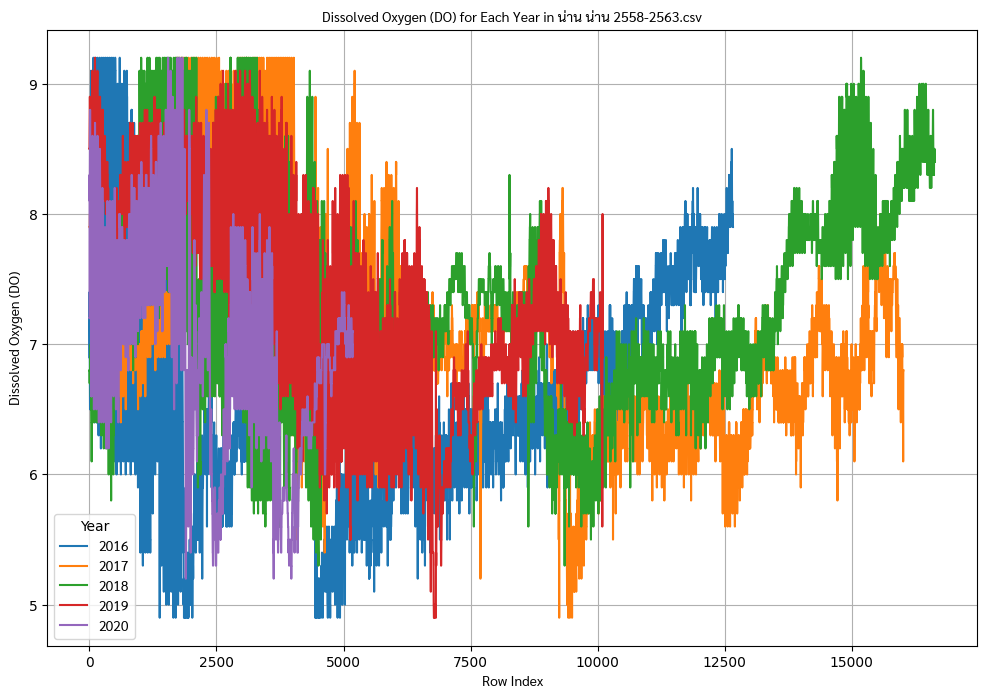

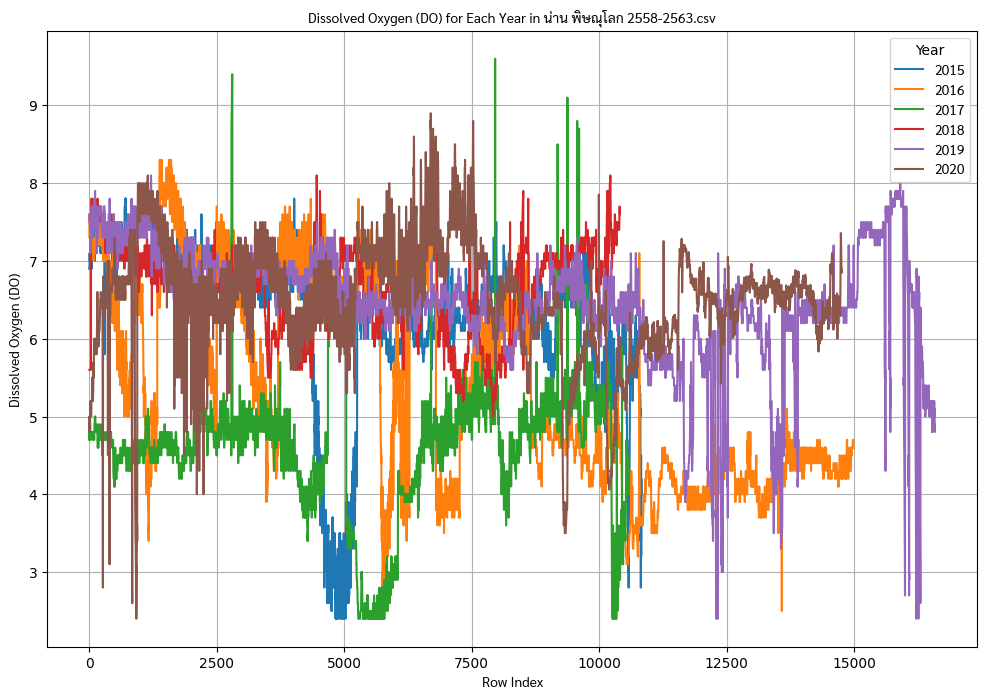

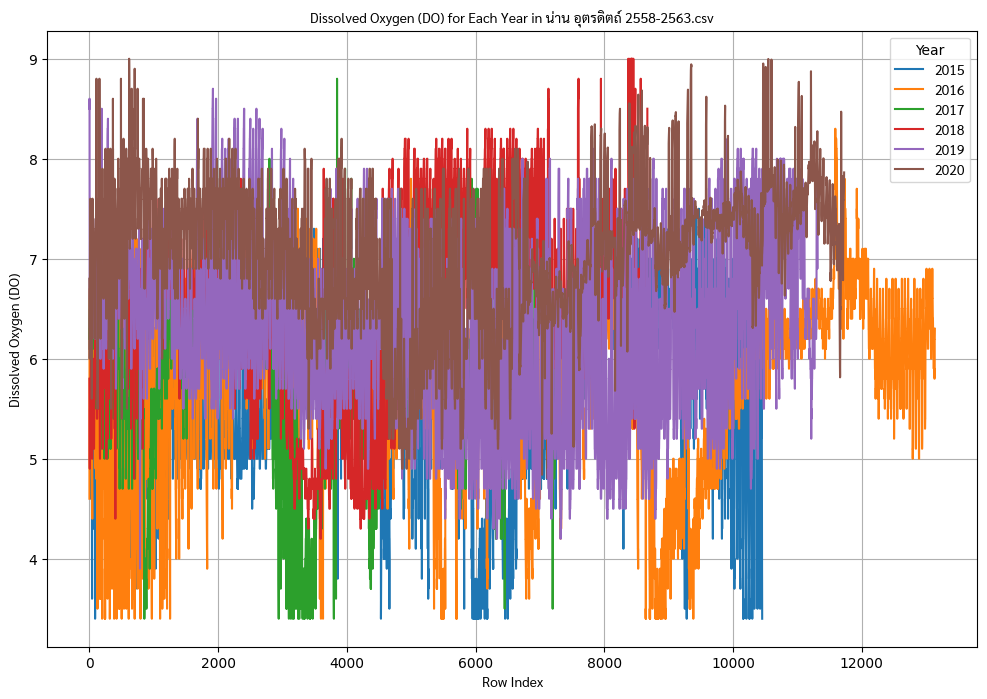

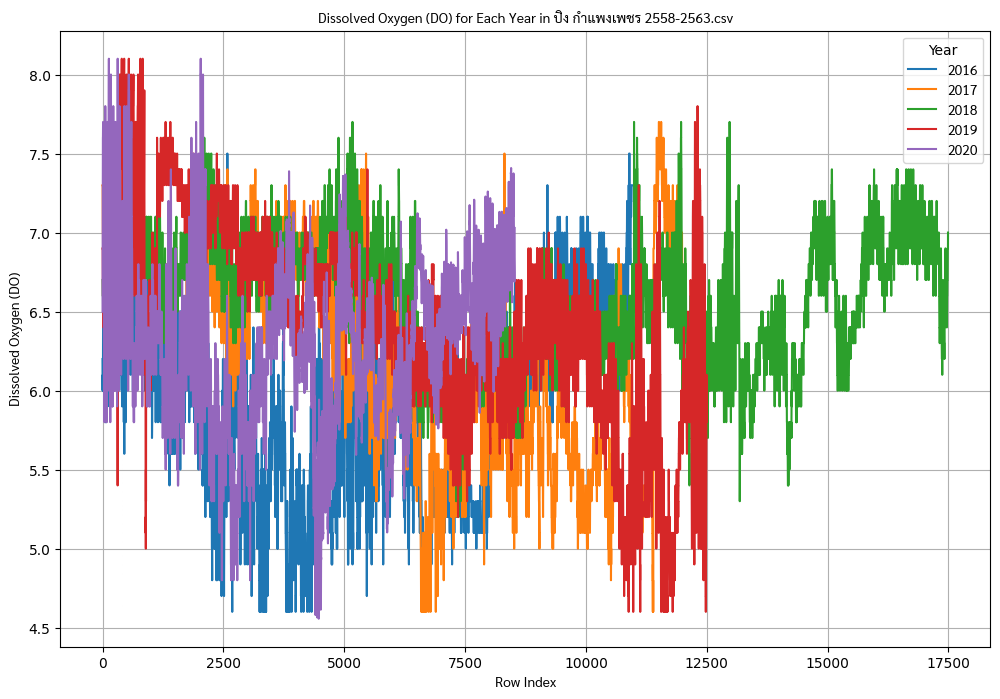

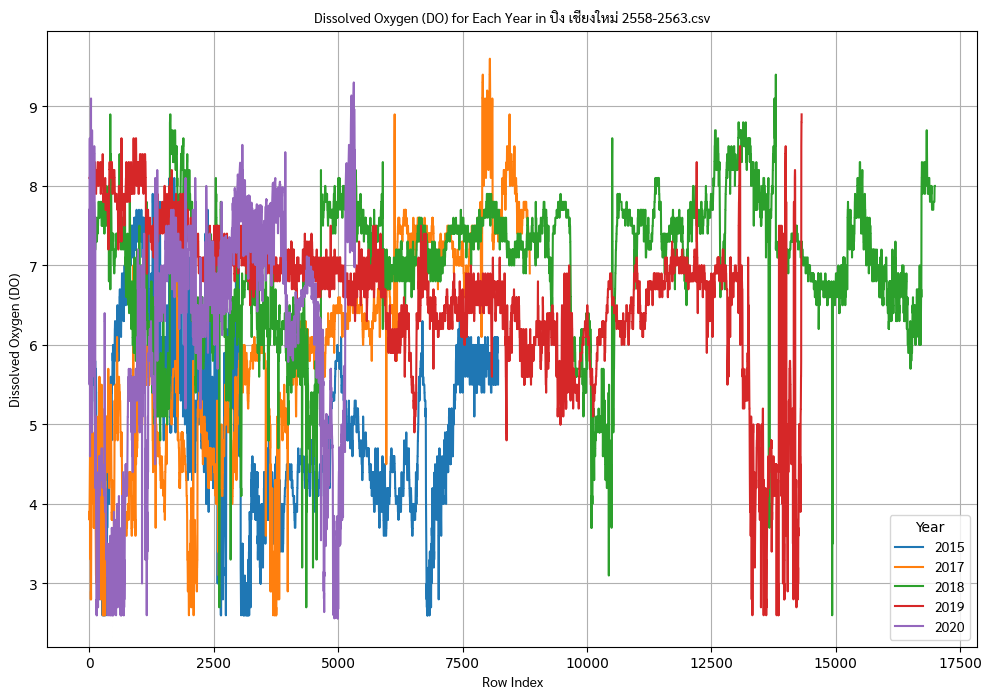

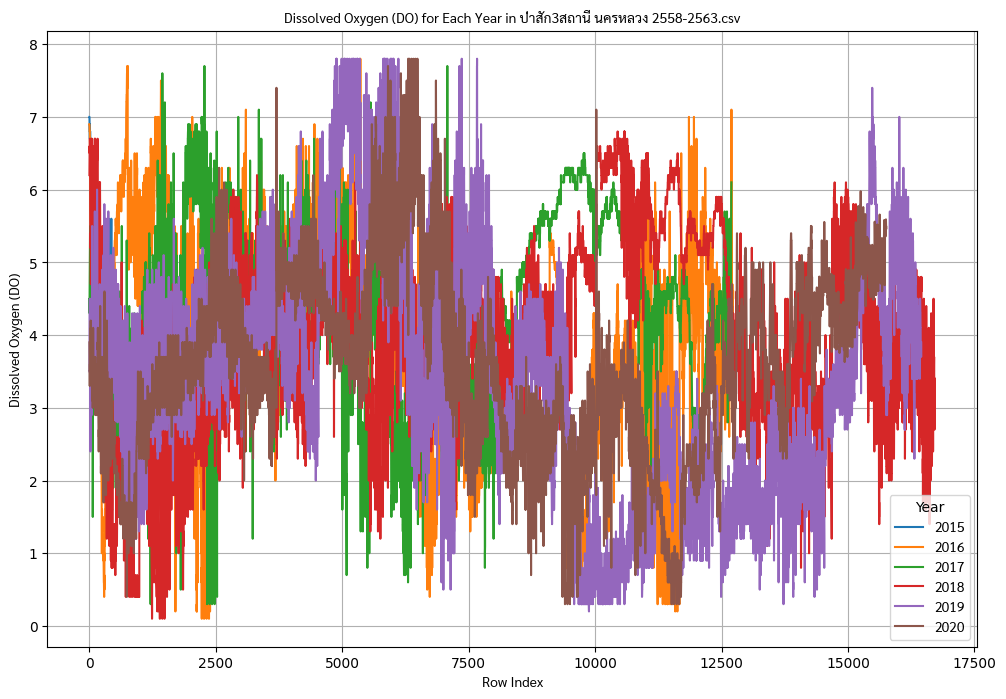

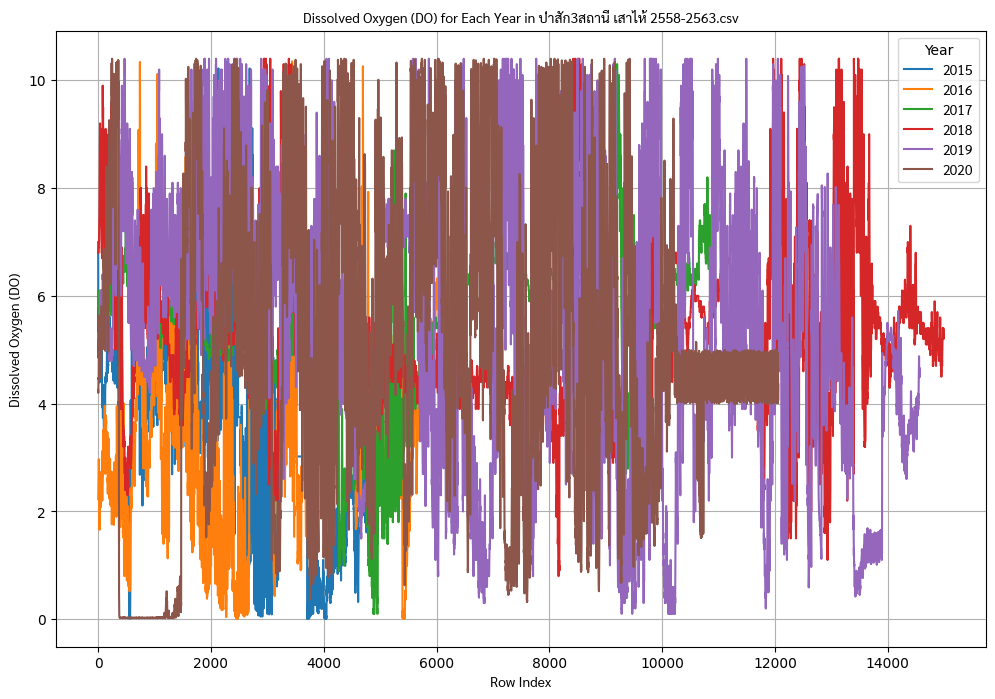

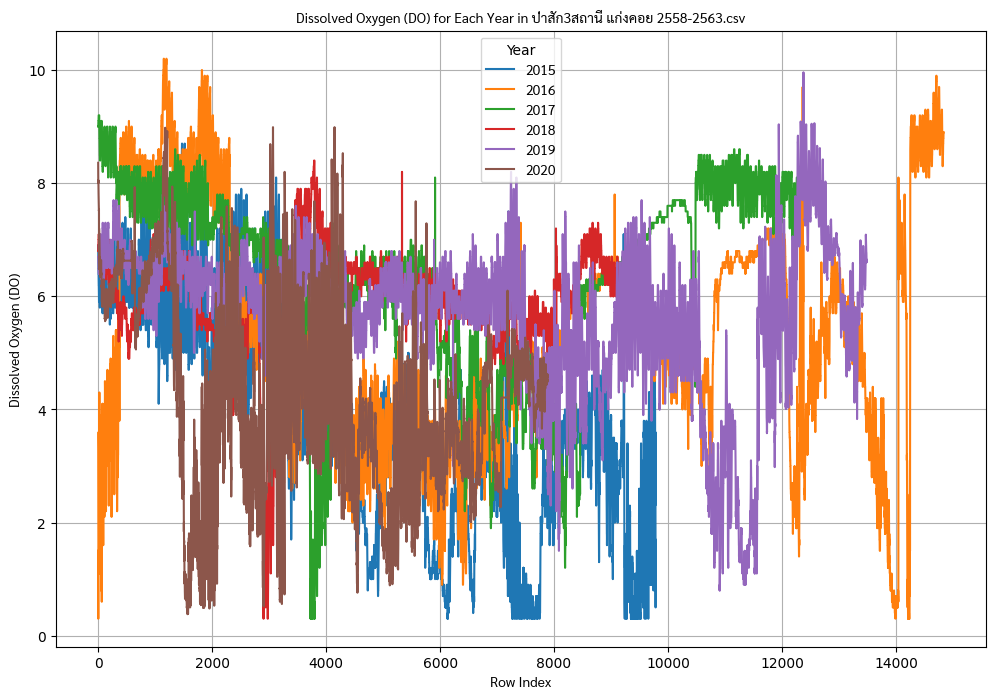

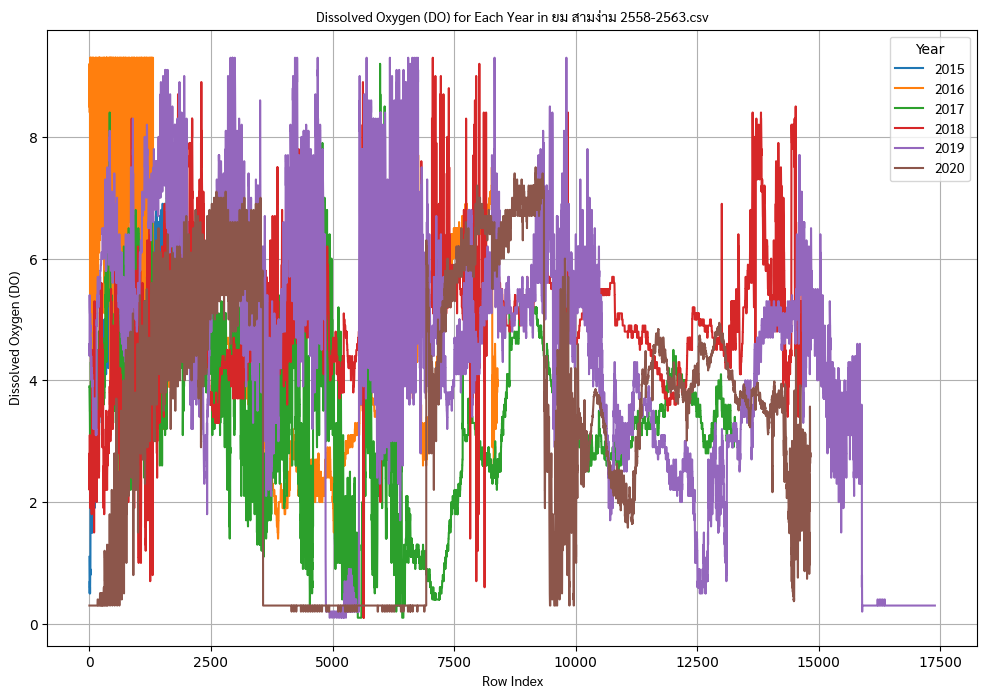

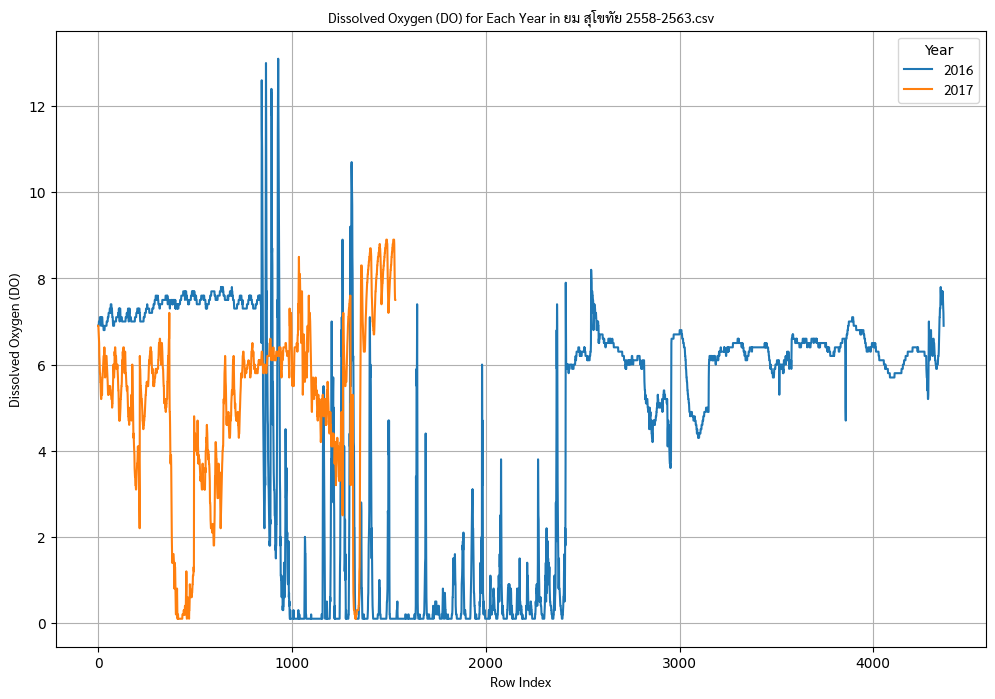

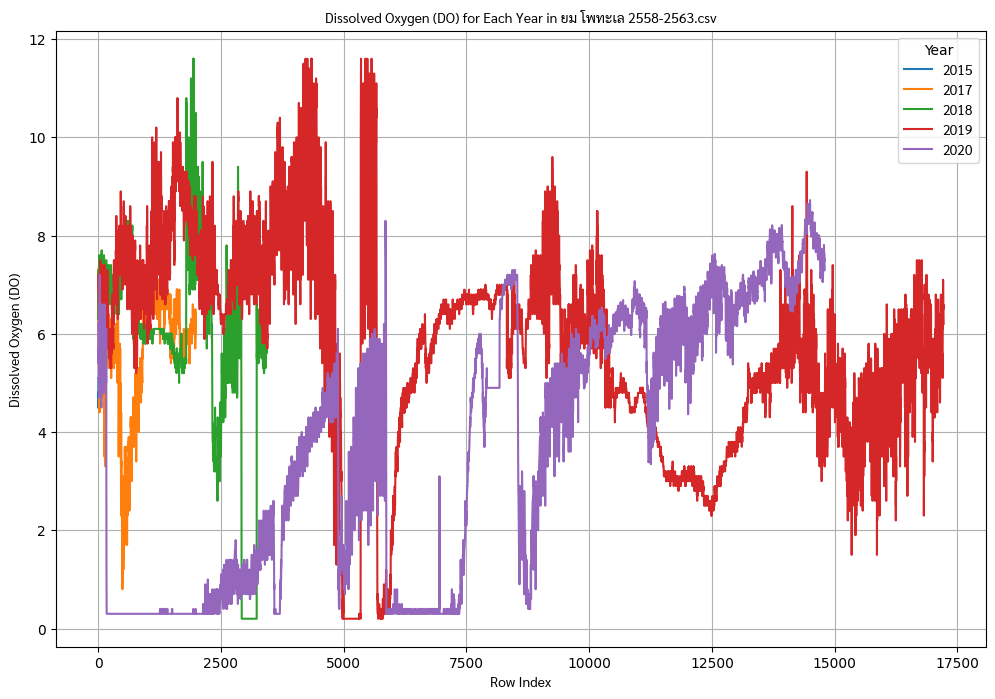

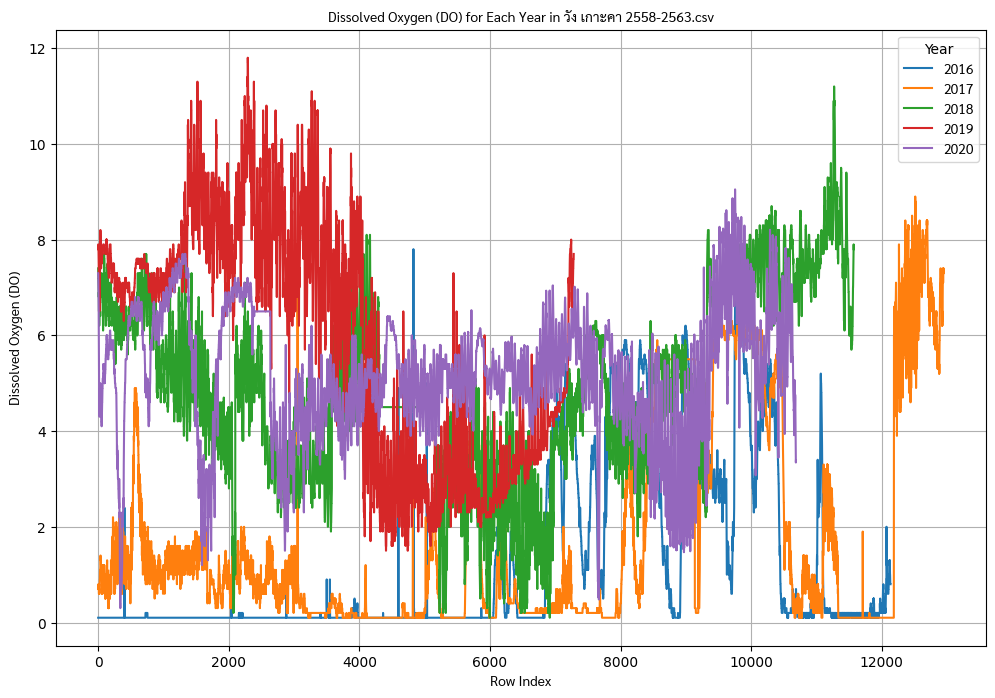

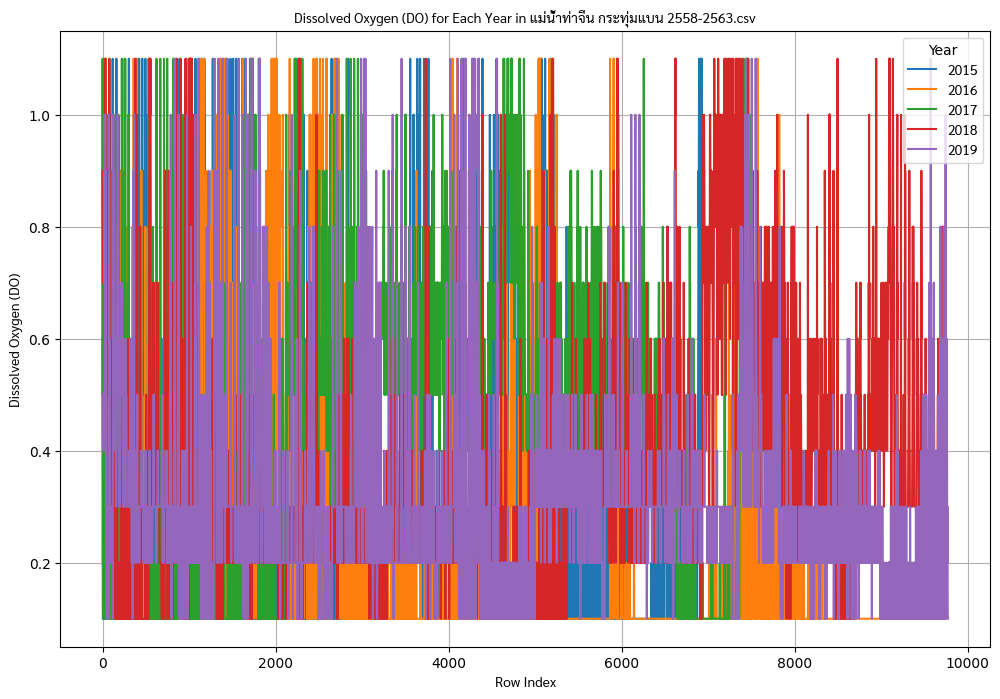

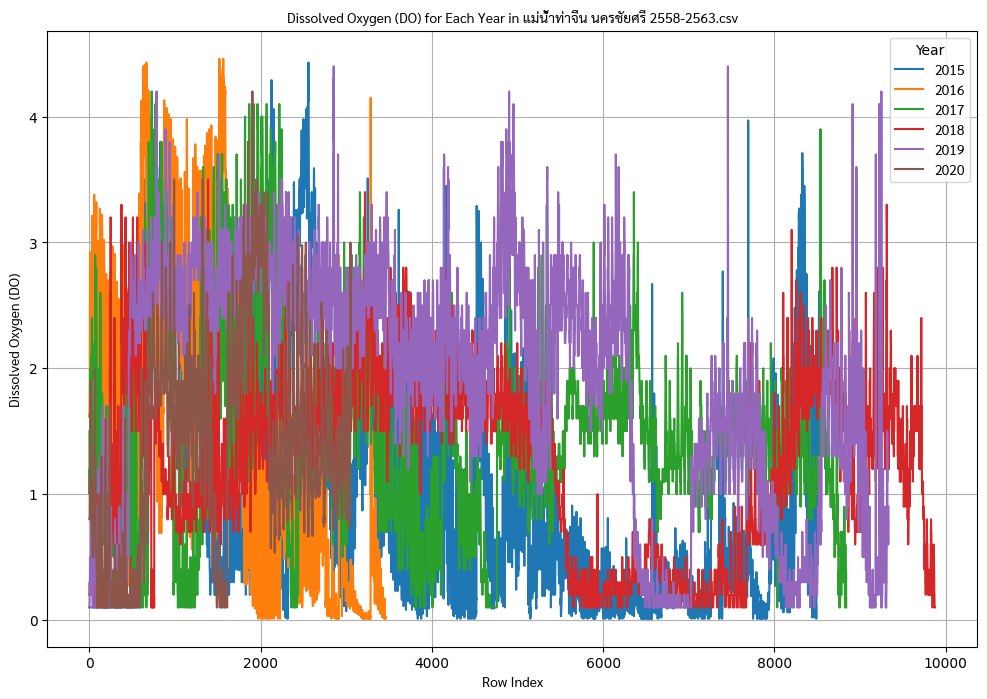

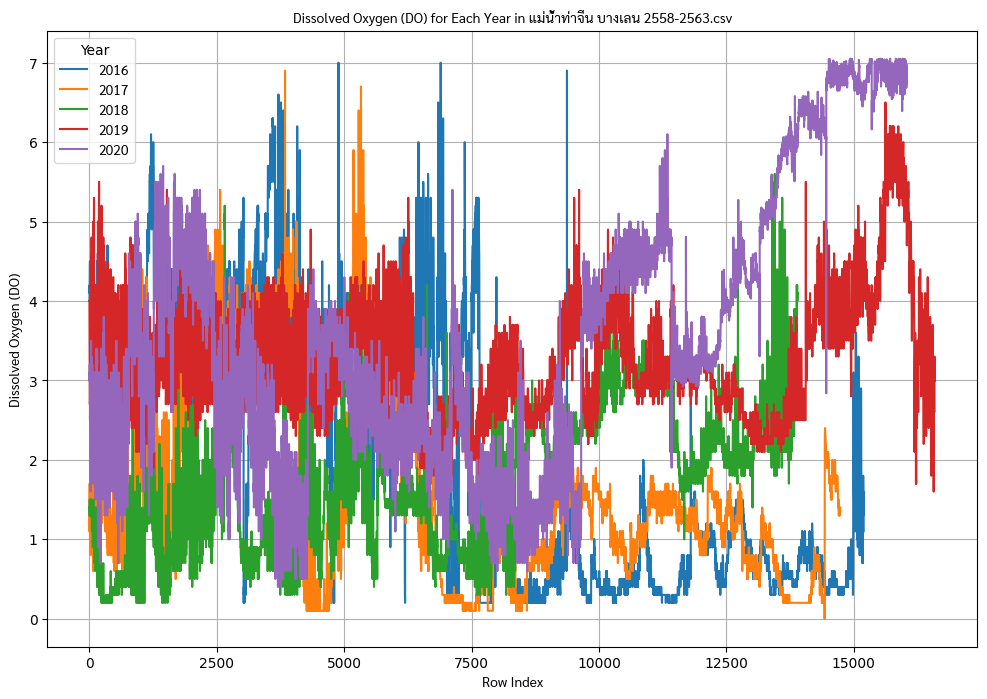

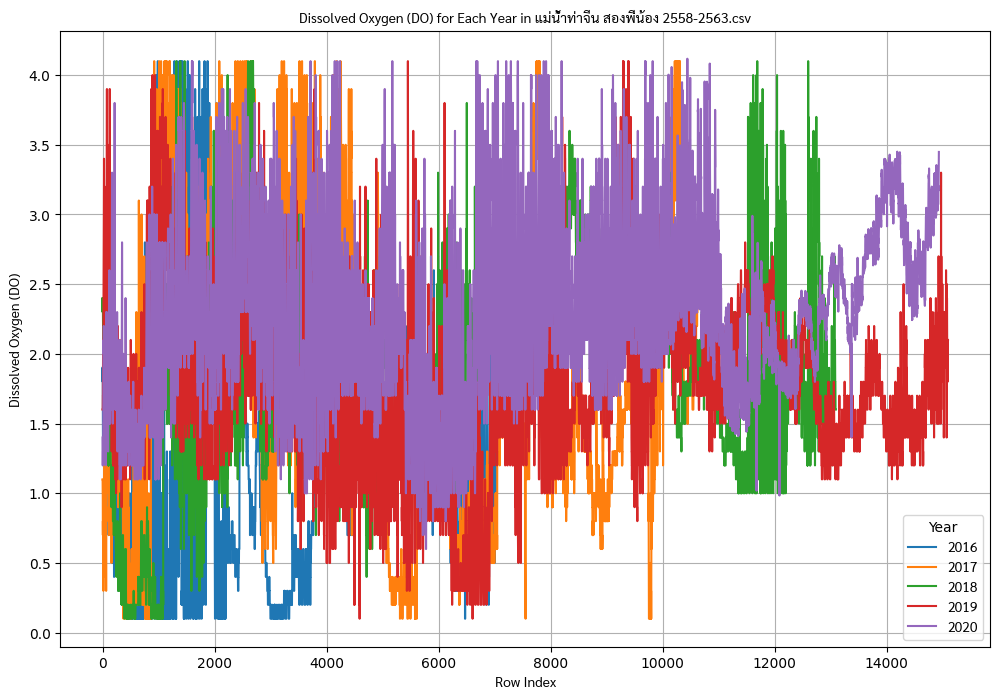

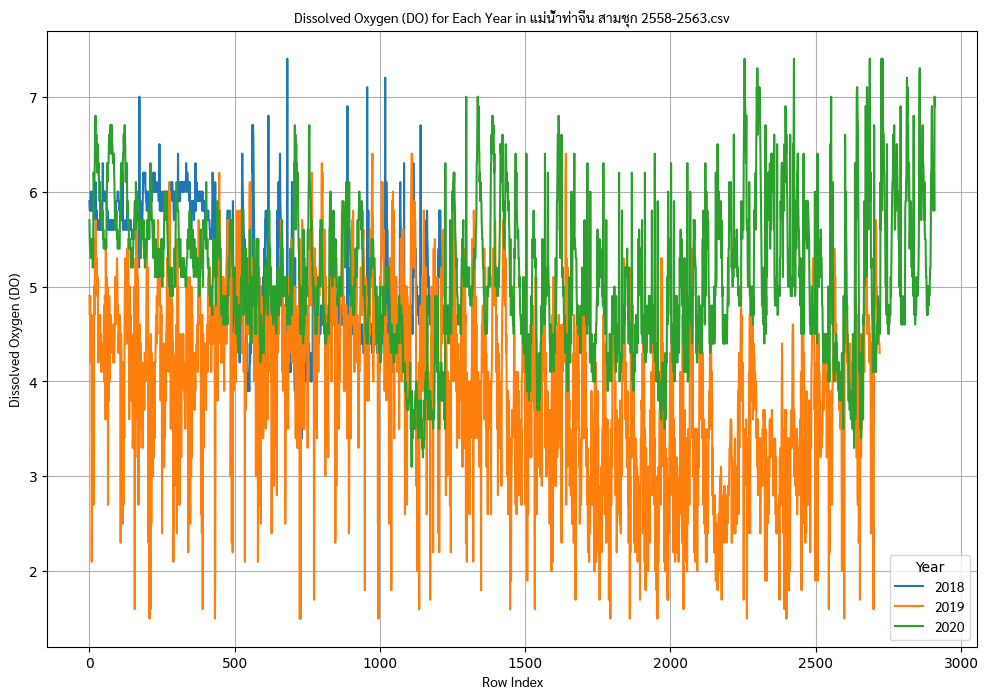

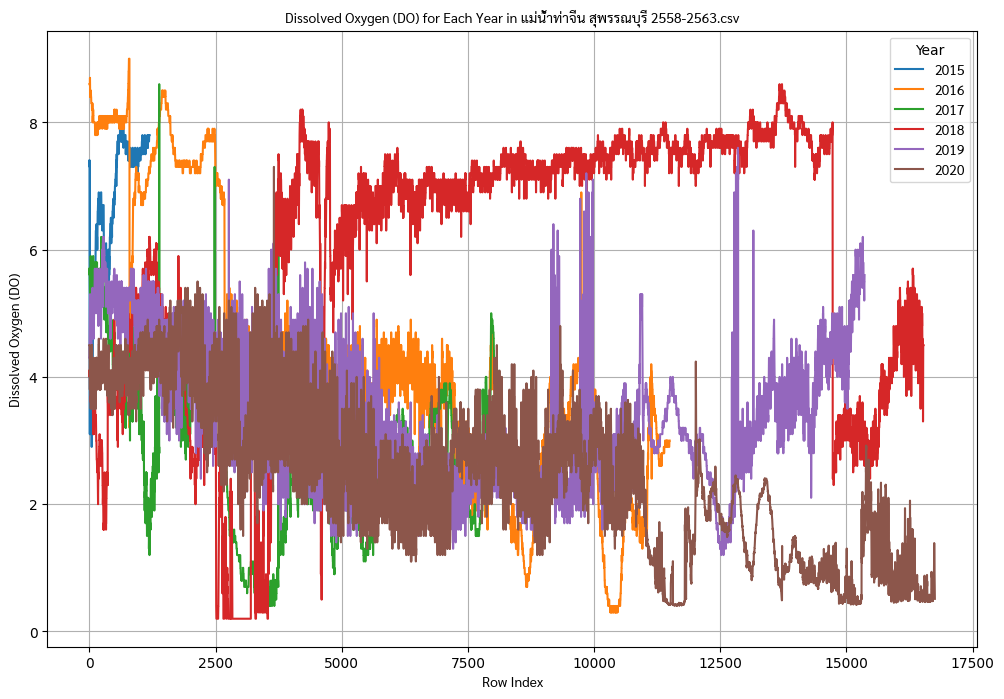

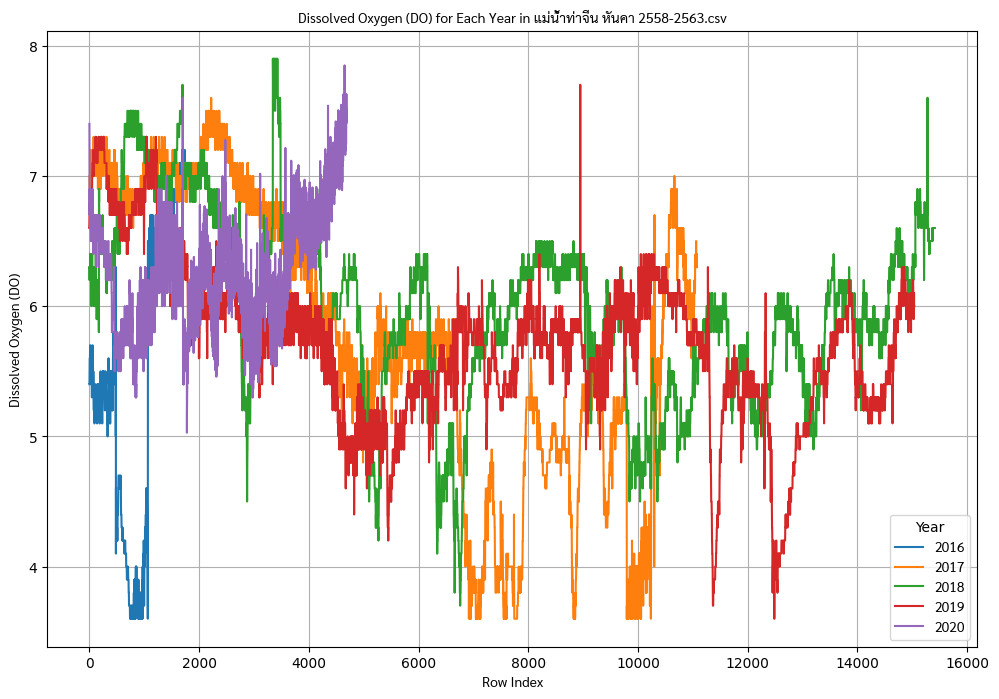

In [2]:
csv_files = [f for f in glob(path.join("../output", "*.csv")) if not f.endswith("output.csv")]
font_prop = font_manager.FontProperties(fname="../submodules/sarabun-font/fonts/Sarabun-Regular.ttf")

plt.figure(figsize=(15, 10))

for file in csv_files:
    df = read_csv(file)
    df["Datetime"] = to_datetime(df["Datetime"])
    df["Year"] = df["Datetime"].dt.year

    plt.figure(figsize=(12, 8))
    for year in df["Year"].unique():
        yearly_data = df[df["Year"] == year]["DO"].reset_index(drop=True)
        plt.plot(yearly_data.index, yearly_data.values, label=str(year))

    plt.title(f"Dissolved Oxygen (DO) for Each Year in {path.basename(file)}", fontproperties=font_prop)
    plt.xlabel("Row Index", fontproperties=font_prop)
    plt.ylabel("Dissolved Oxygen (DO)", fontproperties=font_prop)
    plt.legend(title="Year", prop=font_prop)
    plt.grid(True)
    plt.show()